In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math
from collections import Counter, defaultdict, namedtuple
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
np.set_printoptions(precision=4, suppress=True)

Experiments with Hierarchical Dirichlet Processes (not nested)

Sources:  
https://people.eecs.berkeley.edu/~jordan/papers/hdp.pdf (esp. equations 20 and 21)  
http://mlg.eng.cam.ac.uk/tutorials/07/ywt.pdf  (esp. slide 39; may have some typos?)  

\begin{align*}
% From HDP paper
\beta'_k &\sim \mathrm{Beta}(1, \gamma) \\
\beta_k &= \beta'_k \prod_{\ell=1}^{k-1} (1-\beta'_\ell) \\
\pi'_{j,k} &\sim \mathrm{Beta}\left(\alpha \beta_k, \; \alpha \left( 1 - \sum_{\ell=1}^k \beta_\ell \right)\right) \\
\pi_{j,k} &= \pi'_{j,k} \prod_{\ell=1}^{k-1} (1-\pi'_{j,\ell})
%
% From tutorial slides... possibly has typos?
%\beta_{0,k} &\sim \mathrm{Beta}(1, \gamma) \\
%\pi_{0,k} &= \beta_{0,k} \prod_{\ell=1}^{k-1}(1-\beta_{0,\ell}) \\
%\beta_{j,k} &\sim \mathrm{Beta}\left(\alpha \beta_{0,k}, \; \alpha\left(1-\sum_{\ell=1}^k \beta_{0,\ell}\right)\right) \\
%\pi_{j,k} &= \beta_{j,k} \prod_{\ell=1}^{k-1}(1-\beta_{j,\ell})
\end{align*}

Hyperparameters: $\alpha$, $\gamma$

In [4]:
def get_stick_lengths(x):
    '''
    Given i.i.d. beta-distributed random variables,
    compute the corresponding stick lengths
    '''
    orig_shape = x.shape
    if x.ndim == 1:
        x = np.reshape(x, (1, -1))
    shifted = np.hstack([np.zeros((x.shape[0], 1)), x[:, :-1]])
    cumprod = np.cumprod(1 - shifted, axis=1)
    result = x * cumprod
    return result.reshape(orig_shape)

In [5]:
gamma = 3.0  # hyperparameter for base dirichlet process
alpha = 3.0  # hyperparameter for derived dirichlet processes

In [6]:
truncation = 10
num_obs = 20

In [7]:
beta_prime = np.random.beta(1, gamma, size=(truncation,))
beta = get_stick_lengths(beta_prime)

eps = np.spacing(1)  # a very small floating-point number
a = np.clip(alpha * beta, eps, None)
b = np.clip(alpha * (1 - np.cumsum(beta)), eps, None)
pi_prime = np.random.beta(a, b, size = (num_obs, truncation))
pi = get_stick_lengths(pi_prime)

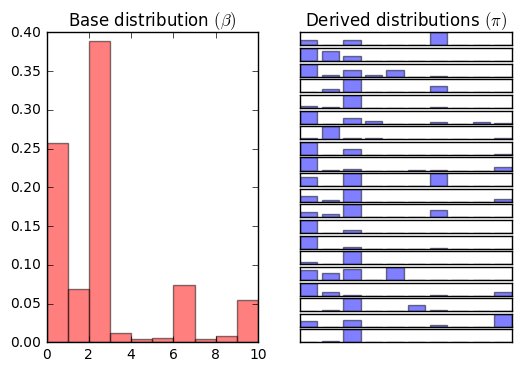

In [8]:
fig = plt.figure()
gs = GridSpec(num_obs, 2)
big_ax = fig.add_subplot(gs[:, 0])
big_ax.bar(np.arange(truncation), beta, width=1, color='red', alpha=0.5)
big_ax.set_title(r"Base distribution $(\beta)$")
for i in range(num_obs):
    ax = fig.add_subplot(gs[i, 1], xticks=[], yticks=[])
    ax.bar(np.arange(truncation), pi[i, :], alpha=0.5, color='blue')
    if i == 0:
        ax.set_title(r"Derived distributions $(\pi)$")
None